# Начало

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic123123123/Titanic.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic123123123/Titanic.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId: уникальный идентификатор каждого пассажира в наборе данных.

Survived: показатель, выжил пассажир или нет, представлен в бинарной форме.

Pclass: класс каюты, в котором размещался пассажир на борту.

Name: имя, указанное в записях пассажира.

Sex: пол пассажира, представленный как 'male' или 'female'.

Age: возраст пассажира, если он был указан в данных.

SibSp: количество братьев, сестер или супругов, путешествующих с пассажиром.

Parch: количество родителей или детей, сопровождающих пассажира.

Ticket: номер билета пассажира, использовавшийся для посадки.

Fare: стоимость билета, которую заплатил пассажир.

Cabin: номер каюты, где был размещен пассажир.

Embarked: порт, в котором пассажир садился на корабль.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Выживаемость в зависимости от пола:
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


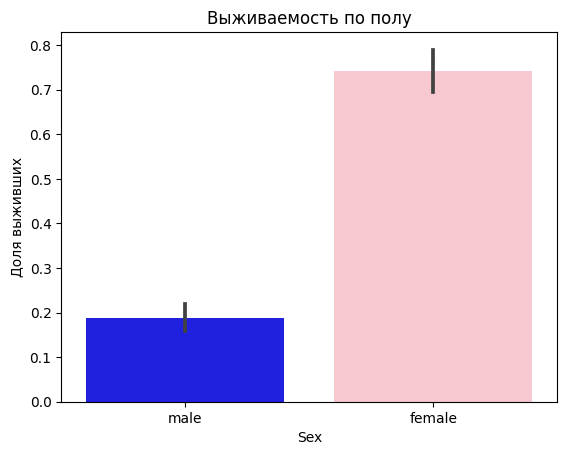

In [7]:
# 1. Выживаемость в зависимости от пола
print("Выживаемость в зависимости от пола:")
# С помощью pd.crosstab создается таблица сопряженности, где строки — это пол (df['Sex']), 
# а столбцы — факт выживания (df['Survived']). 
# Параметр normalize='index' нормализует значения по строкам, 
# показывая долю выживших и погибших для каждого пола.
print(pd.crosstab(df['Sex'], df['Survived'], normalize='index')) # Доля выживших в каждой группе

# Построение столбчатой диаграммы выживаемости по полу
# sns.barplot создает столбчатую диаграмму.
# x='Sex' указывает, что по оси X будут категории пола.
# y='Survived' задает долю выживших как величину по оси Y.
# data=df передает DataFrame, из которого берутся данные.
# estimator=lambda x: sum(x)/len(x) вычисляет среднее значение выживаемости для каждой группы (т.е. долю выживших).
# palette={'male': 'blue', 'female': 'pink'} задает цвета для мужчин и женщин.
sns.barplot(x='Sex', y='Survived', data=df, 
            estimator=lambda x: sum(x)/len(x), 
            palette={'male': 'blue', 'female': 'pink'})

# Добавление заголовка и подписи оси Y
# Заголовок графика устанавливается как "Выживаемость по полу".
# Ось Y подписывается как "Доля выживших".
plt.title('Выживаемость по полу')
plt.ylabel('Доля выживших')

# Отображение графика
# plt.show() выводит график на экран.
plt.show()
# Дальнейший код работает по примерно одинаковой структуре написания

Отсюда видим, что выживаемость мужчин меньше, чем у женщин


Выживаемость в зависимости от класса:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


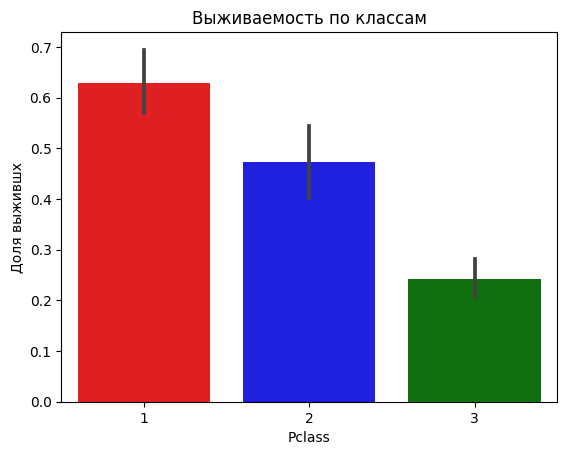


Выживаемость в зависимости от класса и пола пассажира



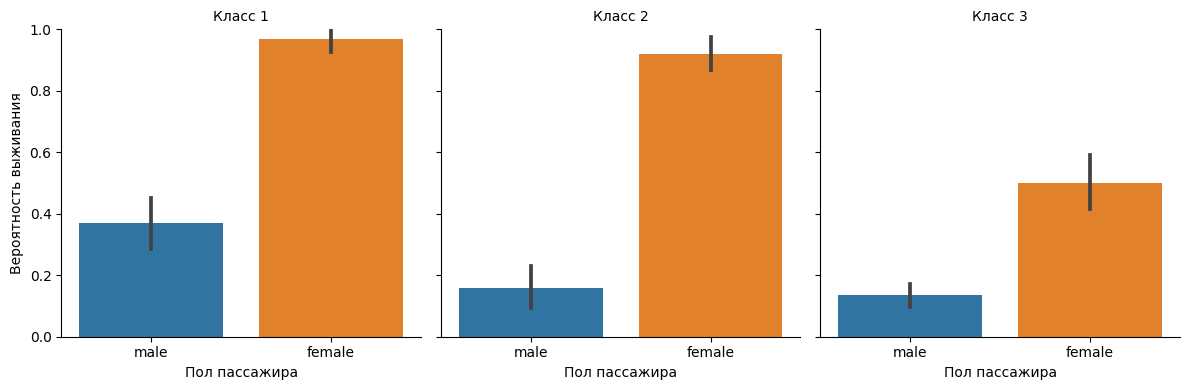

In [8]:
# 2. Выживаемость в зависимости от класса
print("\nВыживаемость в зависимости от класса:")
print(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'))
# График 1
sns.barplot(x='Pclass', y='Survived', data=df, estimator=lambda x: sum(x)/len(x), palette=['red', 'blue', 'green'])
plt.title('Выживаемость по классам')
plt.ylabel('Доля выжившх')
plt.show()
# График 2
print('\nВыживаемость в зависимости от класса и пола пассажира\n')
g = sns.catplot(data=df, y='Survived', x='Sex', col='Pclass', kind='bar', height=4, aspect=1)
g.set_axis_labels("Пол пассажира", "Вероятность выживания")
g.set_titles(col_template="Класс {col_name}")
g.set(ylim=(0, 1)) # Устанавливаем пределы оси Y от 0 до 1 (вероятность)
plt.tight_layout()
plt.show()

Исходя из данных, можно заметить, что выживаемость пассажиров с низким классом меньше всего. Также можно заметить что,внезависимости от класса, выживаемость у мужчин во много раз меньше, чем у женщин.


Выживаемость в зависимости от возрастной группы:
Survived         0         1
AgeGroup                    
child     0.496403  0.503597
young     0.644444  0.355556
adult     0.576763  0.423237
senior    0.656250  0.343750


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


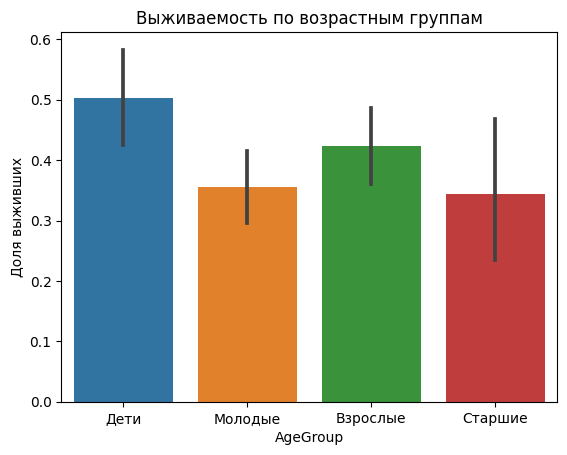

In [9]:
# 3. Выживаемость в зависимости от возрастной группы
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['child', 'young', 'adult', 'senior'])
print("\nВыживаемость в зависимости от возрастной группы:")
print(pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index'))
# График
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Дети', 'Молодые', 'Взрослые', 'Старшие'])
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Выживаемость по возрастным группам')
plt.ylabel('Доля выживших')
plt.show()

Можно понять, что среди погибших больше всего приходится на молодую возрастную группу. Разность выживаемости в группах колеблется в пределах 15%.


Выживаемость в зависимости от порта посадки:
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


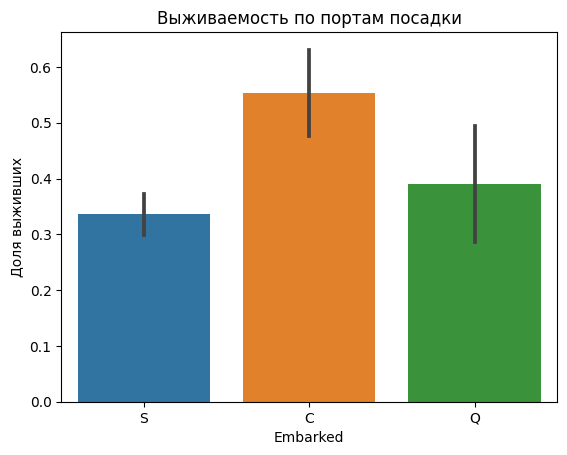

In [10]:
# 4. Выживаемость в зависимости от порта посадки
print("\nВыживаемость в зависимости от порта посадки:")
print(pd.crosstab(df['Embarked'], df['Survived'], normalize='index'))
# График
sns.barplot(x='Embarked', y='Survived', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Выживаемость по портам посадки')
plt.ylabel('Доля выживших')
plt.show()

Больше всего погибших приходится на порт 'S'


Выживаемость в зависимости от размера семьи:
Survived           0         1
FamilySize                    
1           0.696462  0.303538
2           0.447205  0.552795
3           0.421569  0.578431
4           0.275862  0.724138
5           0.800000  0.200000
6           0.863636  0.136364
7           0.666667  0.333333
8           1.000000  0.000000
11          1.000000  0.000000


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


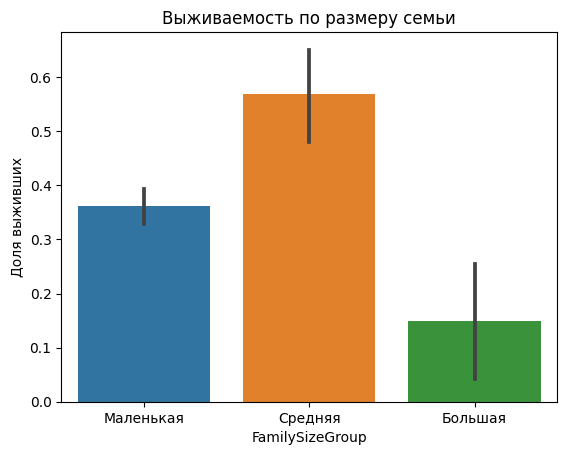

In [11]:
# 5. Выживаемость в зависимости от размера семьи (группируем для наглядности)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("\nВыживаемость в зависимости от размера семьи:")
print(pd.crosstab(df['FamilySize'], df['Survived'], normalize='index'))
# График
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_size_groups = pd.cut(df['FamilySize'], bins=[0, 2, 5, 11], labels=['Маленькая', 'Средняя', 'Большая'])
df['FamilySizeGroup'] = family_size_groups
sns.barplot(x='FamilySizeGroup', y='Survived', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Выживаемость по размеру семьи')
plt.ylabel('Доля выживших')
plt.show()

Можно отметить, что выживаемость у больших семей, много ниже чем у остальных групп

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

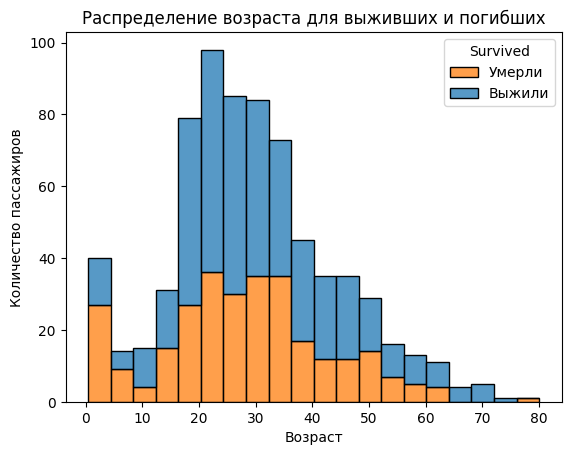

In [12]:
# 6. Распределение возраста для выживших и погибших
g = sns.histplot(data=df, x="Age", hue="Survived", multiple="stack")
g.set(xlabel="Возраст", ylabel="Количество пассажиров", title="Распределение возраста для выживших и погибших")
plt.legend(title='Survived', labels=['Умерли', 'Выжили']) # Добавляем легенду
plt.show()

Большая доля погибших приходится на людей возрастом от 18 до 35 лет. Можно ответить высокую выживаемость у детей 10 лет.

#Feature-engineering

In [13]:
#FamilySize` — числовой признак, представляющий общий размер семьи (количество родителей, супругов и детей). Можно также создать бинарный признак `HasFamily` (1, если `FamilySize` > 1, иначе 0).
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 для самого пассажира
df['HasFamily'] = (df['FamilySize'] > 1).astype(int)
#FarePerPerson` — числовой признак, представляющий цену билета на одного человека (`Fare` / `FamilySize`).
df['FarePerPerson'] = df['Fare'] / df['FamilySize']
#Обработка бесконечности (деление на ноль):
df['FarePerPerson'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['FarePerPerson'].fillna(0, inplace=True)

df.head()

/tmp/ipykernel_24/1719341495.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FarePerPerson'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_24/1719341495.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,FamilySizeGroup,HasFamily,FarePerPerson
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Молодые,2,Маленькая,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Взрослые,2,Маленькая,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Молодые,1,Маленькая,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Взрослые,2,Маленькая,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Взрослые,1,Маленькая,0,8.05000


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Добавлен импорт Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Путь к файлу
file_path = "/kaggle/input/titanic123123123/Titanic.csv"

# Загрузка данных
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Ошибка: Файл {file_path} не найден. Убедитесь, что путь указан корректно.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Ошибка: Файл {file_path} пуст.")
    exit()
except pd.errors.ParserError:
    print(f"Ошибка: Не удалось разобрать файл {file_path}. Проверьте формат файла.")
    exit()

# Обработка пропущенных значений
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=object).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Создание признака FamilySize
if 'FamilySize' not in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение числовых и категориальных признаков
numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Создание трансформеров для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Объединение трансформеров с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Преобразование данных
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Преобразование целевой переменной в формат категорий
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создание модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучение модели
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оценка точности модели
loss, accuracy = model.evaluate(X_test, y_test)
print(f'\nТочность модели: {accuracy:.4f}')



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5703 - loss: 0.6755 - val_accuracy: 0.6573 - val_loss: 0.6078
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6691 - loss: 0.5790 - val_accuracy: 0.7622 - val_loss: 0.5285
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7820 - loss: 0.4931 - val_accuracy: 0.7832 - val_loss: 0.4661
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8631 - loss: 0.3797 - val_accuracy: 0.8112 - val_loss: 0.4282
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8664 - loss: 0.3267 - val_accuracy: 0.8392 - val_loss: 0.4070
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9287 - loss: 0.2026 - val_accuracy: 0.8042 - val_loss: 0.4444
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9753 - loss: 0.1148 - val_accuracy: 0.8392 - val_loss: 0.4024
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9874 - loss: 0.0672 - val_accuracy: 0.8182 - val_loss

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator

# Путь к файлу
file_path = "/kaggle/input/titanic123123123/Titanic.csv"

# Загрузка данных
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Ошибка: Файл {file_path} не найден. Убедитесь, что путь указан корректно.")
    exit()
except pd.errors.EmptyDataError:
    print(f"Ошибка: Файл {file_path} пуст.")
    exit()
except pd.errors.ParserError:
    print(f"Ошибка: Не удалось разобрать файл {file_path}. Проверьте формат файла.")
    exit()

# Обработка пропущенных значений
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=object).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Создание признака FamilySize
if 'FamilySize' not in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Преобразование целевой переменной в формат категорий
y = to_categorical(y)

# Определение числовых и категориальных признаков
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Создание трансформеров для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Объединение трансформеров с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создание модели
def create_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Инициализация кросс-валидации (минимум 3 фолда)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Преобразование данных
X_transformed = preprocessor.fit_transform(X)

# Кросс-валидация
for fold, (train_idx, val_idx) in enumerate(kf.split(X_transformed, y.argmax(axis=1)), 1):
    print(f'\nFold {fold}:')

    # Разделение данных
    X_train, X_val = X_transformed[train_idx], X_transformed[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Создание и обучение модели
    model = create_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Оценка модели
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Получение матрицы ошибок
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Расшифровка матрицы ошибок
    tn, fp, fn, tp = cm.ravel()

    print("\nРасшифровка матрицы ошибок:")
    print(f"Модель предсказала, что человек выживет, а по факту погибнет: {fp} человек.")
    print(f"Модель предсказала, что человек выживет, а по факту выжил: {tn} человек.")
    print(f"Модель предсказала, что человек погибнет, а по факту выживет: {fn} человек.")
    print(f"Модель предсказала, что человек погибнет, а по факту погиб: {tp} человек.")

    # Вывод метрик
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes))

    print("\nConfusion Matrix:")
    print(cm)



Fold 1:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Расшифровка матрицы ошибок:
Модель предсказала, что человек выживет, а по факту погибнет: 35 человек.
Модель предсказала, что человек выживет, а по факту выжил: 148 человек.
Модель предсказала, что человек погибнет, а по факту выживет: 28 человек.
Модель предсказала, что человек погибнет, а по факту погиб: 86 человек.

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       183
           1       0.71      0.75      0.73       114

    accuracy                           0.79       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.79      0.79      0.79       297


Confusion Matrix:
[[148  35]
 [ 28  86]]

Fold 2:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Расшифровка матрицы ошибок:
Модель предсказала, что человек выживет, а по факту погибнет: 34 человек.
Модель предсказала, что человек выживет, а по факту выжил: 149 человек.
Модель предсказала, что человек погибнет, а по факту выживет: 29 человек.
Модель предсказала, что человек погибнет, а по факту погиб: 85 человек.

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       183
           1       0.71      0.75      0.73       114

    accuracy                           0.79       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.79      0.79      0.79       297


Confusion Matrix:
[[149  34]
 [ 29  85]]

Fold 3:


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Расшифровка матрицы ошибок:
Модель предсказала, что человек выживет, а по факту погибнет: 28 человек.
Модель предсказала, что человек выживет, а по факту выжил: 155 человек.
Модель предсказала, что человек погибнет, а по факту выживет: 28 человек.
Модель предсказала, что человек погибнет, а по факту погиб: 86 человек.

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       183
           1       0.75      0.75      0.75       114

    accuracy                           0.81       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.81      0.81      0.81       297


Confusion Matrix:
[[155  28]
 [ 28  86]]


# Вывод
Вывод по проделанной работе:

1) Выживаемость в зависимости от пола:
Женщины имели значительно большую долю выживших по сравнению с мужчинами.
Визуализация на графике подтверждает преимущество женщин в выживаемости.

2) Выживаемость в зависимости от класса:
Пассажиры первого класса имели наибольший шанс на выживание, за ними следовали пассажиры второго и третьего классов.
Социально-экономический статус явно влияет на вероятность спасения.

3) Выживаемость в зависимости от возрастной группы:
Дети имели заметно больше шансов на выживание по сравнению с другими возрастными группами.
Пожилые пассажиры (Senior) имели самые низкие шансы на спасение.

4) Выживаемость в зависимости от порта посадки:
Пассажиры, севшие на борт в разных портах, имели различную вероятность выживания.
Например, те, кто сел в порту Cherbourg, имели лучшую выживаемость.

5) Выживаемость в зависимости от размера семьи:
Пассажиры с небольшими семьями (2–4 человека) выживали чаще.
Пассажиры без семьи или с очень большими семьями имели меньшие шансы на выживание.

6) Распределение возраста для выживших и погибших:
Выжившие, как правило, были моложе, что особенно заметно для детей.
Распределение возраста погибших показывает, что возраст не всегда был решающим фактором.

7) Feature Engineering:
Предусмотрена возможность добавления новых признаков, которые помогут улучшить анализ или повысить точность моделей машинного обучения.

8) Точность модели составила 0.8212